In [1]:
import pandas as pd
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
a = pd.read_csv('fiat500.csv')

In [3]:
a.head(10)

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700
5,6,pop,74,3623,70225,1,45.000702,7.682270,7900
6,7,lounge,51,731,11600,1,44.907242,8.611560,10750
7,8,lounge,51,1521,49076,1,41.903221,12.495650,9190
8,9,sport,73,4049,76000,1,45.548000,11.549470,5600
9,10,sport,51,3653,89000,1,45.438301,10.991700,6000


In [4]:
a.tail(5)

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
1533,1534,sport,51,3712,115280,1,45.069679,7.70492,5200
1534,1535,lounge,74,3835,112000,1,45.845692,8.66687,4600
1535,1536,pop,51,2223,60457,1,45.481541,9.41348,7500
1536,1537,lounge,51,2557,80750,1,45.000702,7.68227,5990
1537,1538,pop,51,1766,54276,1,40.323410,17.56827,7900


In [5]:
a.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [6]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1538 non-null   int64  
 1   model            1538 non-null   object 
 2   engine_power     1538 non-null   int64  
 3   age_in_days      1538 non-null   int64  
 4   km               1538 non-null   int64  
 5   previous_owners  1538 non-null   int64  
 6   lat              1538 non-null   float64
 7   lon              1538 non-null   float64
 8   price            1538 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 108.3+ KB


In [7]:
a['model'].unique()

array(['lounge', 'pop', 'sport'], dtype=object)

In [8]:
a['engine_power'].unique()

array([51, 74, 73, 62, 63, 66, 77, 58], dtype=int64)

In [9]:
a.groupby(['model']).count()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
model,,,,,,,,
lounge,1094,1094,1094,1094,1094,1094,1094,1094
pop,358,358,358,358,358,358,358,358
sport,86,86,86,86,86,86,86,86


In [10]:
a.groupby(['previous_owners']).count()

,ID,model,engine_power,age_in_days,km,lat,lon,price
previous_owners,,,,,,,,
1,1389,1389,1389,1389,1389,1389,1389,1389
2,117,117,117,117,117,117,117,117
3,23,23,23,23,23,23,23,23
4,9,9,9,9,9,9,9,9


In [11]:
a.groupby(['engine_power']).count()

,ID,model,age_in_days,km,previous_owners,lat,lon,price
engine_power,,,,,,,,
51,1453,1453,1453,1453,1453,1453,1453,1453
58,1,1,1,1,1,1,1,1
62,43,43,43,43,43,43,43,43
63,1,1,1,1,1,1,1,1
66,1,1,1,1,1,1,1,1
73,22,22,22,22,22,22,22,22
74,14,14,14,14,14,14,14,14
77,3,3,3,3,3,3,3,3


In [12]:
b= a.drop(['lat','ID'],axis =1)

In [13]:
b.shape

(1538, 7)

In [14]:
c = b.drop('lon',axis =1)

In [15]:
c.shape

(1538, 6)

In [16]:
c = pd.get_dummies(c, dtype=int)
c


,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
0,51,882,25000,1,8900,1,0,0
1,51,1186,32500,1,8800,0,1,0
2,74,4658,142228,1,4200,0,0,1
3,51,2739,160000,1,6000,1,0,0
4,73,3074,106880,1,5700,0,1,0
...,...,...,...,...,...,...,...,...
1533,51,3712,115280,1,5200,0,0,1
1534,74,3835,112000,1,4600,1,0,0
1535,51,2223,60457,1,7500,0,1,0
1536,51,2557,80750,1,5990,1,0,0


In [17]:
c.shape

(1538, 8)

In [18]:
y =c['price']

In [19]:
y

0       8900
1       8800
2       4200
3       6000
4       5700
        ... 
1533    5200
1534    4600
1535    7500
1536    5990
1537    7900
Name: price, Length: 1538, dtype: int64

In [20]:
x = c.drop('price',axis=1)

In [21]:
x

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
0,51,882,25000,1,1,0,0
1,51,1186,32500,1,0,1,0
2,74,4658,142228,1,0,0,1
3,51,2739,160000,1,1,0,0
4,73,3074,106880,1,0,1,0
...,...,...,...,...,...,...,...
1533,51,3712,115280,1,0,0,1
1534,74,3835,112000,1,1,0,0
1535,51,2223,60457,1,0,1,0
1536,51,2557,80750,1,1,0,0


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [23]:
x_test.head(5)

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
481,51,3197,120000,2,0,1,0
76,62,2101,103000,1,0,1,0
1502,51,670,32473,1,1,0,0
669,51,913,29000,1,1,0,0
1409,51,762,18800,1,1,0,0


In [24]:
y_train.head(5)

527    9990
129    9500
602    7590
331    8750
323    9100
Name: price, dtype: int64

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [26]:
ypred = reg.predict(x_test)

In [27]:
ypred

array([ 5867.6503378 ,  7133.70142341,  9866.35776216,  9723.28874535,
       10039.59101162,  9654.07582608,  9673.14563045, 10118.70728123,
        9903.85952664,  9351.55828437, 10434.34963575,  7732.26255693,
        7698.67240131,  6565.95240435,  9662.90103518, 10373.20344286,
        9599.94844451,  7699.34400418,  4941.33017994, 10455.2719478 ,
       10370.51555682, 10391.60424404,  7529.06622456,  9952.37340054,
        7006.13845729,  9000.1780961 ,  4798.36770637,  6953.10376491,
        7810.39767825,  9623.80497535,  7333.52158317,  5229.18705519,
        5398.21541073,  5157.65652129,  8948.63632836,  5666.62365159,
        9822.1231461 ,  8258.46551788,  6279.2040404 ,  8457.38443276,
        9773.86444066,  6767.04074749,  9182.99904787, 10210.05195479,
        8694.90545226, 10328.43369248,  9069.05761443,  8866.7826029 ,
        7058.39787506,  9073.33877162,  9412.68162121, 10293.69451263,
       10072.49011135,  6748.5794244 ,  9785.95841801,  9354.09969973,
      

In [28]:
filename = 'model'
pickle.dump(reg,open(filename,'wb'))

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.8415526986865394

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ypred,y_test)

581887.727391353

In [31]:
res = pd.DataFrame(columns=['price','predicted'])
res['price'] = y_test
res['predicted'] = ypred
res = res.reset_index()
res['ID'] = res.index
res.head(10)

,index,price,predicted,ID
0,481,7900,5867.650338,0
1,76,7900,7133.701423,1
2,1502,9400,9866.357762,2
3,669,8500,9723.288745,3
4,1409,9700,10039.591012,4
5,1414,9900,9654.075826,5
6,1089,9900,9673.145630,6
7,1507,9950,10118.707281,7
8,970,10700,9903.859527,8
9,1198,8999,9351.558284,9


[]

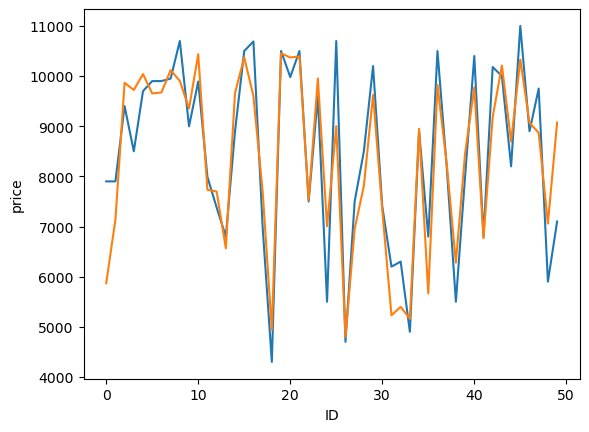

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='ID',y='price',data=res.head(50))
sns.lineplot(x='ID',y='predicted',data=res.head(50))
plt.plot()

In [162]:
new = [[51,2197,7000,1,1,0,0]]
real = reg.predict(new)
real

array([9034.46069594])

In [163]:
cor_mat = c.corr()
cor_mat

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
engine_power,1.000000,0.319190,0.285495,-0.005030,-0.277235,-0.133321,0.024783,0.217362
age_in_days,0.319190,1.000000,0.833890,0.075775,-0.893328,-0.259863,0.108327,0.313276
km,0.285495,0.833890,1.000000,0.097539,-0.859373,-0.255746,0.109024,0.303874
previous_owners,-0.005030,0.075775,0.097539,1.000000,-0.076274,-0.024643,-0.019316,0.084129
price,-0.277235,-0.893328,-0.859373,-0.076274,1.000000,0.302299,-0.167190,-0.288706
model_lounge,-0.133321,-0.259863,-0.255746,-0.024643,0.302299,1.000000,-0.864605,-0.382017
model_pop,0.024783,0.108327,0.109024,-0.019316,-0.167190,-0.864605,1.000000,-0.134050
model_sport,0.217362,0.313276,0.303874,0.084129,-0.288706,-0.382017,-0.134050,1.000000


<Axes: >

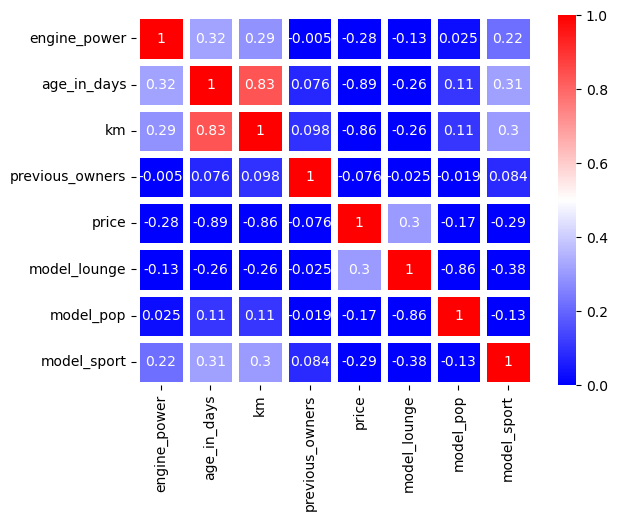

In [164]:
sns.heatmap(cor_mat,vmax=1,vmin=0,annot=True,linewidth=5,cmap='bwr')

<Axes: >

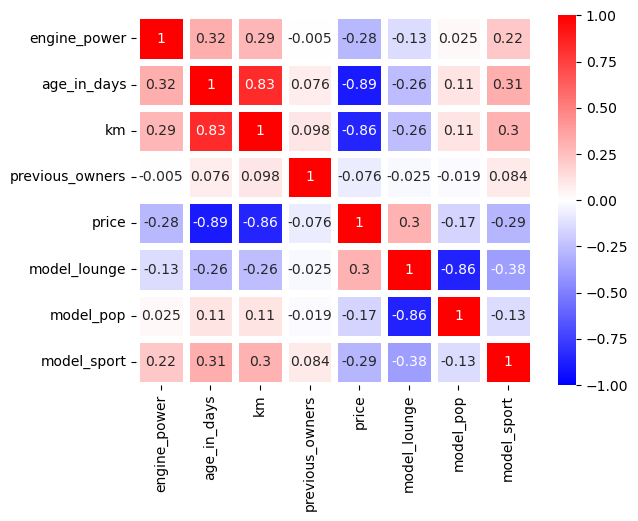

In [165]:
sns.heatmap(cor_mat,vmax=1,vmin=-1,annot=True,linewidth=5,cmap='bwr')

<Axes: >

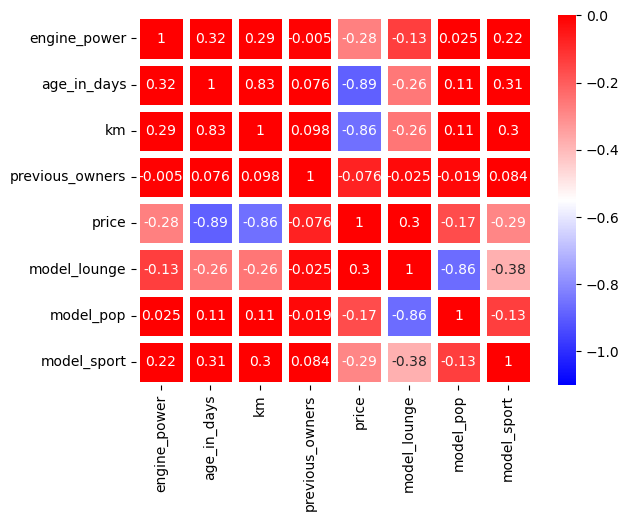

In [166]:
sns.heatmap(cor_mat,vmax=-1,vmin=0,annot=True,linewidth=5,cmap='bwr')

In [167]:
#Ridge Regression

In [168]:
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import Ridge
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]
ridge = Ridge()
parameters = {'alpha': alpha}
ridge_regressor = GridSearchCV(ridge, parameters)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]})

In [169]:
ridge_regressor.best_params_

{'alpha': 30}

In [170]:
ridge=Ridge(alpha=30)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

In [171]:
from sklearn.metrics import mean_squared_error
Ridge_Error=mean_squared_error(y_pred_ridge,y_test)
Ridge_Error

579521.7970897449

In [172]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_ridge)

0.8421969385523054

In [173]:
Results = pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']= y_test
Results['Predicted']= y_pred_ridge
#Results['km']=X_test['km']
Results = Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,481,7900,5869.741155,0
1,76,7900,7149.563327,1
2,1502,9400,9862.785355,2
3,669,8500,9719.283532,3
4,1409,9700,10035.895686,4
5,1414,9900,9650.311090,5
6,1089,9900,9669.183317,6
7,1507,9950,10115.128380,7
8,970,10700,9900.241944,8
9,1198,8999,9347.080772,9


[]

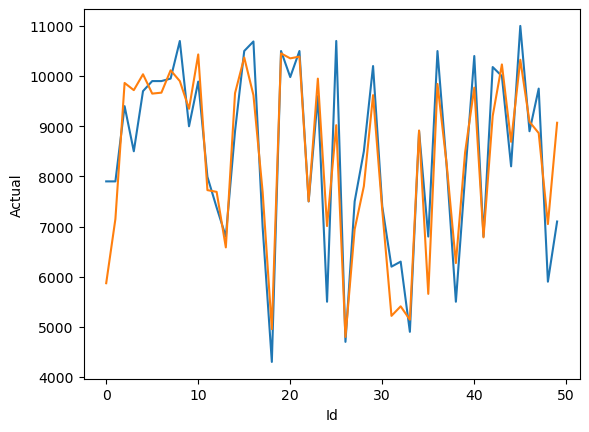

In [174]:
sns.lineplot(x='Id',y='Actual',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

[]

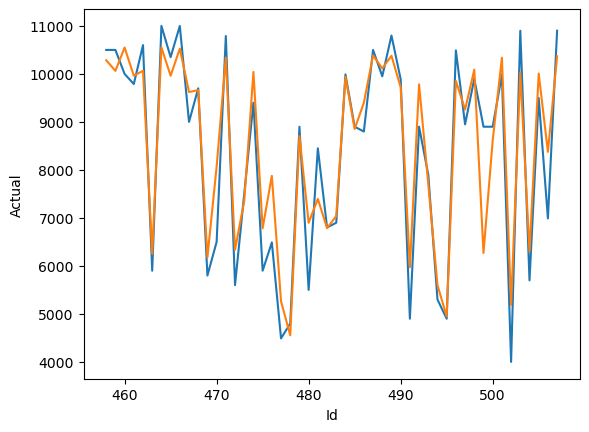

In [175]:
sns.lineplot(x='Id',y='Actual',data=Results.tail(50))
sns.lineplot(x='Id',y='Predicted',data=Results.tail(50))
plt.plot()

In [176]:
#Elastic net

In [177]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
elastic_regressor = GridSearchCV(elastic, parameters)
elastic_regressor.fit(x_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [178]:
elastic_regressor.best_params_

{'alpha': 0.01}

In [179]:
elastic=ElasticNet(alpha=.01)
elastic.fit(x_train,y_train)
y_pred_elastic=elastic.predict(x_test)

In [180]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_elastic)

0.841688021120299

In [181]:
elastic_Error=mean_squared_error(y_pred_elastic,y_test)
elastic_Error

581390.7642825295

In [182]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred_elastic
#Results['km']=X_test['km']
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,481,7900,5867.742075,0
1,76,7900,7136.527402,1
2,1502,9400,9865.726723,2
3,669,8500,9722.573593,3
4,1409,9700,10038.936496,4
5,1414,9900,9653.407122,5
6,1089,9900,9672.438692,6
7,1507,9950,10118.075470,7
8,970,10700,9903.219809,8
9,1198,8999,9350.750929,9


[]

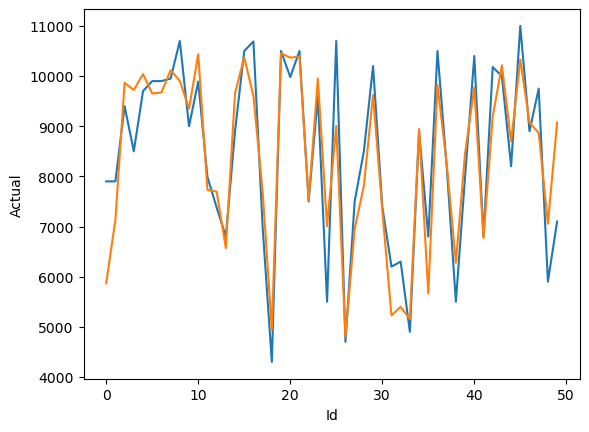

In [183]:
sns.lineplot(x='Id',y='Actual',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

In [184]:
#Random Forest

In [185]:
from sklearn.model_selection import GridSearchCV #GridSearchCV is for parameter tun
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
n_estimators=[25,50,75,100,125,150,175,200] #number of decision trees in the forest
criterion=['squared_error'] #criteria for choosing nodes default = 'gini'
max_depth=[3,5,10] #maximum number of nodes in a tree default = None (it will go ti
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth}
RFC_reg = GridSearchCV(reg, parameters)
RFC_reg.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]})

In [186]:
RFC_reg.best_params_

{'criterion': 'squared_error', 'max_depth': 5, 'n_estimators': 175}

In [187]:
reg=RandomForestRegressor(n_estimators=125,criterion='squared_error',max_depth=5)
reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=125)

In [188]:
y_pred=reg.predict(x_test)
y_pred

array([ 5948.73998848,  7177.74824743,  9802.02394266,  9733.49100919,
       10049.07781288,  9643.90635564,  9711.84536768, 10079.42024468,
        9819.36822972,  9373.21397205, 10338.05730931,  7796.21607292,
        7382.69155318,  7039.28350076,  9567.23155073, 10424.97991648,
        9700.04727194,  7684.63543336,  4978.53172922, 10341.886761  ,
       10099.29423523, 10437.23142139,  7505.2529204 ,  9805.3753857 ,
        7437.18019078,  9025.11340116,  4728.64634694,  7043.32758812,
        7673.09550315,  9561.61745058,  7120.70830124,  5091.24039524,
        5432.53293839,  4990.89747955,  8700.63938353,  5501.44152403,
       10202.06874079,  7400.36183555,  6502.48146432,  8882.42416198,
        9764.88600629,  6803.15509317,  9462.15192155, 10343.36202932,
        8162.12629408, 10430.7662435 ,  9244.87131308,  8780.84129761,
        6544.60141918,  8830.27721229,  9771.9298603 , 10375.60389474,
       10062.96026861,  7084.93503316,  9628.81530127,  9443.97434709,
      

In [189]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8466607327120036

In [190]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred
#Results['km']=X_test['km']
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,481,7900,5948.739988,0
1,76,7900,7177.748247,1
2,1502,9400,9802.023943,2
3,669,8500,9733.491009,3
4,1409,9700,10049.077813,4
5,1414,9900,9643.906356,5
6,1089,9900,9711.845368,6
7,1507,9950,10079.420245,7
8,970,10700,9819.368230,8
9,1198,8999,9373.213972,9


[]

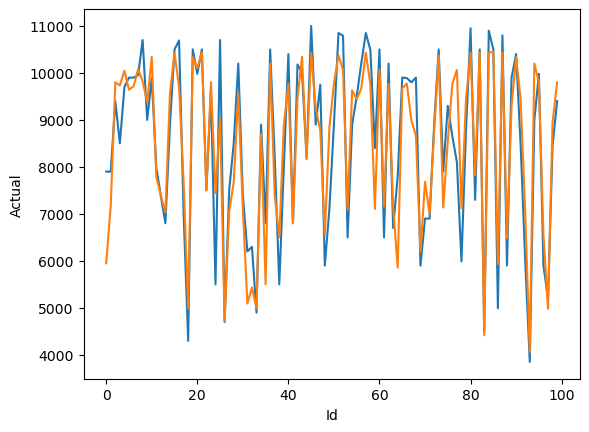

In [191]:
sns.lineplot(x='Id',y='Actual',data=Results.head(100))
sns.lineplot(x='Id',y='Predicted',data=Results.head(100))
plt.plot()